<a href="https://colab.research.google.com/github/MtoriC/trabajos_python/blob/main/EDA_16_WEB_ROOM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA_WEB

* Realizar un analisis EDA sobre las visitas, clicks y el tiempo  pagina web y su rentabilidad por de los años 2021 y 2022.
* Revisar como van los ingresos y rentabilidad del 2023.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos las librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Parte 1 Analisis de vistas (web1)

* 1.Importar los datos (web1)
* 2.Cambiar las columnas
    * dia -> Fecha
    * Visitas de la Págia -> visita_pagina
    * Tiempo promedio en la página (segundos) -> tiempo_seg
* 3.Crear una columna para año y mes
* 4.Verificar si hay nulos
* 5.Crear en un DataFrame nuevo solo 2021 y 2022
* 6.Revisar con un histograma las variables visita_pagina,tiempo_seg y Clicks
* 7.Realizar un ScatterPlot de visita_pagina VS tiempo_seg

In [ ]:
# Importamos los datos
web1 = pd.read_excel("/content/drive/MyDrive/Bootcamp - Clase PYTHON/8_Clases_Python/web_1.xlsx")
web1.head(5)

,dia,Visitas de la Página,Tiempo promedio en la página (segundos),Clicks
0,2018-01-01,3328,71,13
1,2018-02-01,3097,56,7
2,2018-03-01,3202,79,5


In [ ]:
# 2.Cambiar las columnas
web1 = web1.rename(columns={'dia':'Fecha'})
web1 = web1.rename(columns={'Visitas de la Página':'visita_pagina'})
web1 = web1.rename(columns={'Tiempo promedio en la página (segundos)':'tiempo_seg'})
web1.head(5)

,Fecha,visita_pagina,tiempo_seg,Clicks
0,2018-01-01,3328,71,13
1,2018-02-01,3097,56,7
2,2018-03-01,3202,79,5
3,2018-04-01,3170,81,3
4,2018-05-01,2366,50,3


In [ ]:
# 3.Crear una columna para año y mes
web1['año'] = web1['Fecha'].dt.year
web1['mes'] = web1['Fecha'].dt.month
# web1['mes_nombre'] = web1['Fecha'].dt.month_name()
# web1['dia'] = web1['Fecha'].dt.day
web1.head(5)

,Fecha,visita_pagina,tiempo_seg,Clicks,año,mes
0,2018-01-01,3328,71,13,2018,1
1,2018-02-01,3097,56,7,2018,2
2,2018-03-01,3202,79,5,2018,3
3,2018-04-01,3170,81,3,2018,4
4,2018-05-01,2366,50,3,2018,5


In [ ]:
# 4.Verificar si hay nulos
web1.isnull().sum()

Fecha            0
visita_pagina    0
tiempo_seg       0
Clicks           0
año              0
mes              0
dtype: int64

In [ ]:
# 5.Crear en un DataFrame nuevo solo 2021 y 2022
#df_filtered = df[df['año'].isin([2021, 2022])]
web1_new = web1.loc[(web1["año"]==2021) | (web1["año"]==2022)]
print(web1_new,"\n")

        Fecha  visita_pagina  tiempo_seg  Clicks   año  mes
36 2021-01-01           2376          68       5  2021    1
37 2021-02-01           3814          38       7  2021    2
38 2021-03-01           3303          42       7  2021    3
39 2021-04-01           3836          40      11  2021    4
40 2021-05-01           5291          28       9  2021    5
41 2021-06-01           3729          31       4  2021    6
42 2021-07-01           4510          35       8  2021    7
43 2021-08-01           3037          52       6  2021    8
44 2021-09-01           2881          37       7  2021    9
45 2021-10-01           2313          63       5  2021   10
46 2021-11-01           2714          69       9  2021   11
47 2021-12-01           2414          59       3  2021   12
48 2022-01-01           2959          49       5  2022    1
49 2022-02-01           2676          48       5  2022    2
50 2022-03-01           2219          45       7  2022    3
51 2022-04-01           2400          59

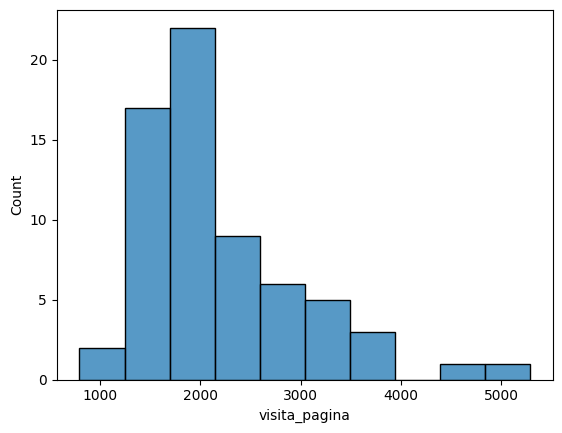

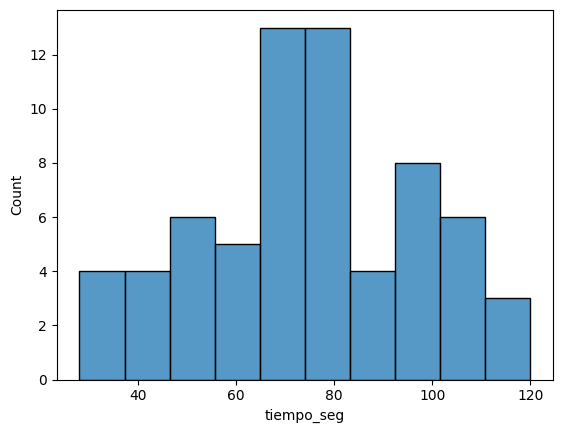

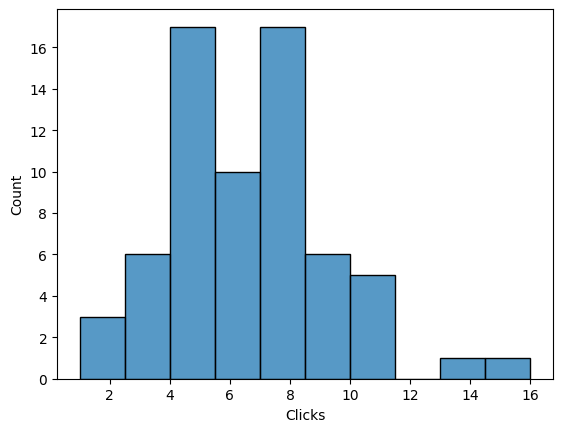

In [ ]:
# 6.Revisar con un histograma las variables visita_pagina,tiempo_seg y Clicks
sns.histplot(
    data=web1['visita_pagina'],
    bins=10,
    kde=False
)
plt.show()
print('\n')

sns.histplot(
    data=web1['tiempo_seg'],
    bins=10,
    kde=False
)
plt.show()
print('\n')

sns.histplot(
    data=web1['Clicks'],
    bins=10,
    kde=False
)
plt.show()

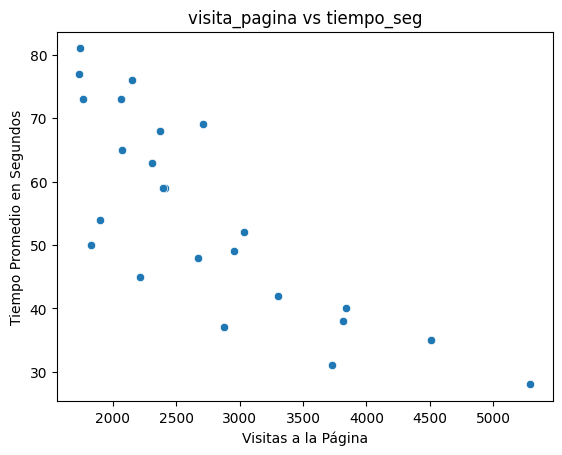

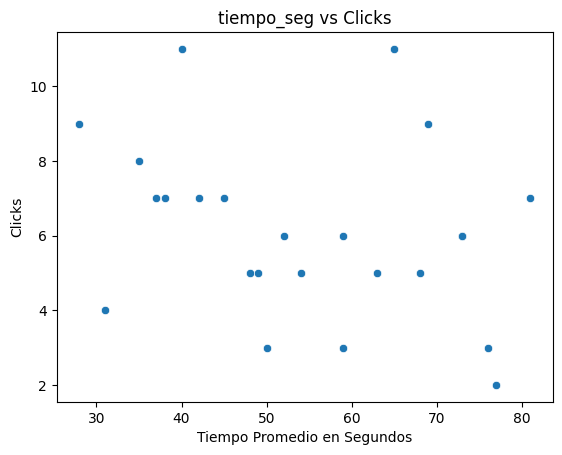

In [95]:
# 7.Realizar un ScatterPlot de visita_pagina VS tiempo_seg
sns.scatterplot(data=web1_new, x='visita_pagina', y='tiempo_seg')
plt.title('visita_pagina vs tiempo_seg')
plt.xlabel('Visitas a la Página')
plt.ylabel('Tiempo Promedio en Segundos')
plt.show()
print('\n')

sns.scatterplot(data=web1_new, x='tiempo_seg', y='Clicks')
plt.title('tiempo_seg vs Clicks')
plt.xlabel('Tiempo Promedio en Segundos')
plt.ylabel('Clicks')
plt.show()

# Parte 2: Analisis de Margenes (web2)

* 1.Importar los datos (web2)
* 2.Calcular el Margen y Rentabilidad
    * Margen -> Ingreso - Gasto
    * Rentabilidad -> Margen/Gasto
    
* 3.Crear una columna para año y mes (similar al anterior).
* 4.Ingresar en un dataFrame solo los años 2021 y 2022 y visualisar agrupado los margenes y rentabilidad por año.
* 5.Hacerlo mismo que 3 pero solo para 2023


In [ ]:
# Importamos los datos
web2 = pd.read_excel("/content/drive/MyDrive/Bootcamp - Clase PYTHON/8_Clases_Python/web_2.xlsx")
web2.head(3)

,dia,Ingresos,Gasto,Margen,Rentabilidad
0,2018-01-01,480728.006,362044.206,NaN,NaN
1,2018-02-01,641155.476,371550.776,NaN,NaN
2,2018-03-01,890076.650,614858.550,NaN,NaN


In [ ]:
# 2.Calcular el Margen y Rentabilidad
web2["Margen"] = (web2["Ingresos"] - web2["Gasto"])
web2["Rentabilidad"] = (web2["Margen"] / web2["Gasto"])
web2

,dia,Ingresos,Gasto,Margen,Rentabilidad
0,2018-01-01,480728.006,362044.206,118683.8,0.327816
1,2018-02-01,641155.476,371550.776,269604.7,0.725620
2,2018-03-01,890076.650,614858.550,275218.1,0.447612
3,2018-04-01,552673.978,348520.978,204153.0,0.585770
4,2018-05-01,750776.984,494685.584,256091.4,0.517685
...,...,...,...,...,...
61,2023-02-01,573918.453,386219.753,187698.7,0.485989
62,2023-03-01,397550.100,272909.500,124640.6,0.456710
63,2023-04-01,282044.858,206488.358,75556.5,0.365912
64,2023-05-01,310116.006,227344.706,82771.3,0.364078


In [ ]:
# 3.Crear una columna para año y mes
web2 =web2.assign(Año = web2['dia'].dt.year)
web2= web2.assign(Mes = web2['dia'].dt.month)
web2

,dia,Ingresos,Gasto,Margen,Rentabilidad,Año,Mes
0,2018-01-01,480728.006,362044.206,118683.8,0.327816,2018,1
1,2018-02-01,641155.476,371550.776,269604.7,0.725620,2018,2
2,2018-03-01,890076.650,614858.550,275218.1,0.447612,2018,3
3,2018-04-01,552673.978,348520.978,204153.0,0.585770,2018,4
4,2018-05-01,750776.984,494685.584,256091.4,0.517685,2018,5
...,...,...,...,...,...,...,...
61,2023-02-01,573918.453,386219.753,187698.7,0.485989,2023,2
62,2023-03-01,397550.100,272909.500,124640.6,0.456710,2023,3
63,2023-04-01,282044.858,206488.358,75556.5,0.365912,2023,4
64,2023-05-01,310116.006,227344.706,82771.3,0.364078,2023,5


In [93]:
# 4.Ingresar en un dataFrame solo los años 2021 y 2022 y visualisar agrupado los margenes y rentabilidad por año.
web2_new = web2.loc[(web2["Año"]==2021) | (web2["Año"]==2022)]
print(web2_new,"\n")

web2_margen = web2_new.groupby("Año")["Margen"].sum()
web2_rentabilidad = web2_new.groupby("Año")["Rentabilidad"].mean()
print(web2_margen)
print(f"\n{web2_rentabilidad}")


          dia    Ingresos       Gasto    Margen  Rentabilidad   Año  Mes
36 2021-01-01  516269.923  322804.823  193465.1      0.599325  2021    1
37 2021-02-01  297812.749  208010.249   89802.5      0.431722  2021    2
38 2021-03-01  692677.087  508308.687  184368.4      0.362710  2021    3
39 2021-04-01  897163.712  630687.012  266476.7      0.422518  2021    4
40 2021-05-01  417727.332  305892.832  111834.5      0.365600  2021    5
41 2021-06-01  326968.752  204281.452  122687.3      0.600580  2021    6
42 2021-07-01  326482.161  212153.761  114328.4      0.538894  2021    7
43 2021-08-01  508026.895  348082.395  159944.5      0.459502  2021    8
44 2021-09-01  413937.080  270683.180  143253.9      0.529231  2021    9
45 2021-10-01  422487.910  340646.510   81841.4      0.240253  2021   10
46 2021-11-01  376751.076  239494.776  137256.3      0.573108  2021   11
47 2021-12-01  410241.178  320066.378   90174.8      0.281738  2021   12
48 2022-01-01  549750.114  411150.814  138599.3    

In [ ]:
# 5.Hacerlo mismo que 3 pero solo para 2023
web2_new2023 = web2.loc[(web2["Año"]==2023)]
web2_new2023

,dia,Ingresos,Gasto,Margen,Rentabilidad,Año,Mes
60,2023-01-01,360032.596,238676.396,121356.2,0.508455,2023,1
61,2023-02-01,573918.453,386219.753,187698.7,0.485989,2023,2
62,2023-03-01,397550.100,272909.500,124640.6,0.456710,2023,3
63,2023-04-01,282044.858,206488.358,75556.5,0.365912,2023,4
64,2023-05-01,310116.006,227344.706,82771.3,0.364078,2023,5
65,2023-06-01,615950.171,409508.971,206441.2,0.504119,2023,6


In [94]:
web2_new2023_margen = web2_new2023.groupby("Año")["Margen"].sum()
web2_new2023_rentabilidad = web2_new2023.groupby("Año")["Rentabilidad"].mean()
print(web2_new2023_margen)
print(f"\n{web2_new2023_rentabilidad}")

Año
2023    798464.5
Name: Margen, dtype: float64

Año
2023    0.447544
Name: Rentabilidad, dtype: float64


#PARTE 3: Conclusiones